# Reading from Excel files

To read form Excel files in Python we use a specialised library called `pandas`. 

In [1]:
# ! pip install pandas

In [2]:
import pandas as pd

In [3]:
# ! pip install openpyxl

In [4]:
# # read in a DataFrame from an Excel file
# df = pd.read_excel("../data/dummy-data.xlsx",usecols=["time", "measurement"])

# df

In [5]:
# df.plot(x="time", y="measurement", kind="line", title="Measurement over time")

Suppose we wanted some statistics, we can do it immediately

In [6]:
# df['measurement'].median()

In [7]:
# df['measurement'].mean()

In [8]:
# df["measurement"].describe()

## On brackets

- Square brackets `[]` are used to access elements in lists, dictionaries, and DataFrames.
- Parentheses `()` are used to call functions and methods.

In [9]:
mydict= {"time": [0,1,2,3,4,5],
         "measurement": [10,12,9,11,13,12] }

In [10]:
mydict["measurement"]

[10, 12, 9, 11, 13, 12]

In [11]:
def myfunc(x):
    return x*2

myfunc(5)

10

## Data on cartilage injury

My own practice using previous data or cartilage injury. 

In [13]:
df = pd.read_excel("../data/4.5dpf_WT.xlsx") # reading our data from an excel file
# print(df)
df

,4.5dpf larvae,Number of neuronal branches
0,C1,31
1,C2,31
2,C3,30
3,C4,27
4,C5,24
5,T1,39
6,T2,37
7,T3,35
8,T4,30


I create a new column called "Group" based on the first letter of the "4.5dpf larvae" column. If the first letter is "C", it maps to "Control"; if it's "T", it maps to "Treated".

In [14]:
df["Group"] = df["4.5dpf larvae"].str[0].map({"C": "Control", "T": "Treated"})
df

,4.5dpf larvae,Number of neuronal branches,Group
0,C1,31,Control
1,C2,31,Control
2,C3,30,Control
3,C4,27,Control
4,C5,24,Control
5,T1,39,Treated
6,T2,37,Treated
7,T3,35,Treated
8,T4,30,Treated


Getting summary statistics for **each** group.

In [19]:
# construct a new DataFrame (our table) by taking the mean and standard deviation of "Number of neuronal branches	" for each "Group"
summary = df.groupby("Group")["Number of neuronal branches"].agg(["mean", "std"])
# help(df.groupby("Group")["Number of neuronal branches"].agg)
summary

,mean,std
Group,,
Control,28.60,3.04959
Treated,35.25,3.86221


/var/folders/k2/zvg_gcvj6dz5q4_t5p1n04240000gp/T/ipykernel_49622/1013305812.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Group", y="Number of neuronal branches", errorbar="se", palette=["skyblue", "salmon"])


<Axes: xlabel='Group', ylabel='Number of neuronal branches'>

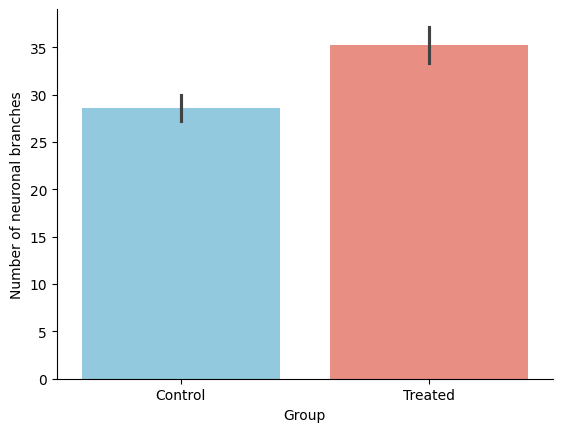

In [54]:
import seaborn as sns

sns.barplot(data=df, x="Group", y="Number of neuronal branches", errorbar="se", palette=["skyblue", "salmon"])


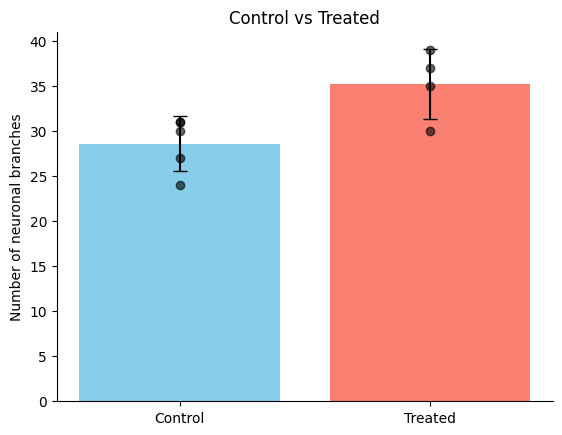

In [49]:

import matplotlib.pyplot as plt
plt.bar(summary.index, summary["mean"], yerr=summary["std"], capsize=5, color=["skyblue", "salmon"])
plt.title("Control vs Treated")
plt.ylabel("Number of neuronal branches")
# filter the Control
# loop over the two names of the groups, using a list that contains both
for name in ["Control", "Treated"]:
    # then use the.query() method to filter only the data points that belong to a group of name `name`
    # we use an f-string, where the {name} are replaced by the value of the variable name
    # filtered_df = df.query(f"Group == '{name}'")
    test = df["Group"] == name
    filtered_df = df[test]
    # loop of all the points in the filtered DataFrame, and plot them as black dots
    for i in filtered_df["Number of neuronal branches"]:
        plt.scatter(name, i, color="k", alpha=0.6)
plt.show()

## f-strings

A normal string is defined as:


In [ ]:
astring = "Hello"

Suppose that you want to combine a string with the value of a variable.

In [43]:
variable = 10
print("Hello",variable)

compound_string = "Hello 10"

print(compound_string)

compound_string = "Hello " + str(variable)

print(compound_string)
# a different way to do this is to use f-strings, or formatted strings
f_string = f"Hello {variable}"
print("My f-string is",f_string)


Hello 10
Hello 10
Hello 10
My f-string is Hello 10


In [48]:
message = "Hello"

v1 = 42
v2 = [1,2,3]
v3 = {"a": 1, "b": 2}

fstring = f"{message} {v1} {v2} {v3}"

print(fstring)

Hello 42 [1, 2, 3] {'a': 1, 'b': 2}


<Axes: title={'center': 'Control vs. Injury'}, xlabel='Group'>

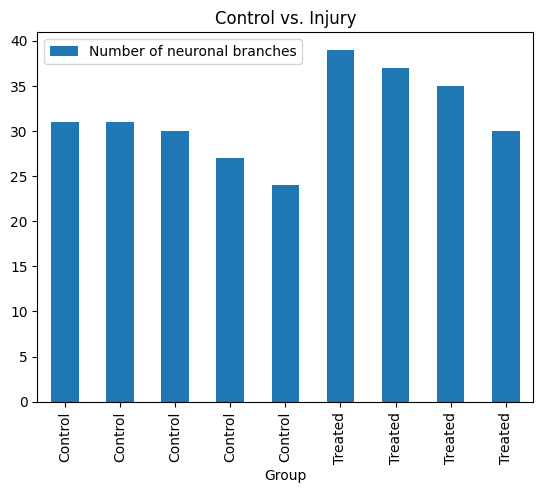

In [29]:
df.plot(x="Group", y="Number of neuronal branches", kind="bar", title="Control vs. Injury")